<a href="https://colab.research.google.com/github/pavi-ninjaac/SARS_CoV_2_DNA_Analysis/blob/main/DNA_Analysis_CovidvsHIV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNA Classification - COVID19 vs HIV

In [29]:
! pip install Bio

In [30]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for fasta file handling 
from Bio import SeqIO
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [31]:
def generate_data(file_list):
  X = []
  y = []
  label = 1 # for hiv
  for i in file_list:
    filepath = '/content/drive/MyDrive/Colab Notebooks/dataFiles/DNA_Genome_Analysis_covid19/'+i+'.fasta'
    records = list(SeqIO.parse(filepath , 'fasta'))

    for index in range(len(records)):
      X.append(str(records[index].seq))
      y.append(label)
    label = 0 #for covid19
  
  data = pd.DataFrame({'DNASequence' : X , 'label' : y})

  return data

In [32]:
file_list = ['HIV' , 'covid19']
data = generate_data(file_list)
data.head(5)

,DNASequence,label
0,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAG...,1
1,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAG...,1
2,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCCCAATAAAAGTAG...,1
3,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCTCAATAAAAGTAG...,1
4,CCTCAAATCACTCTTTGGCAGCGACCCCTGGTCYCAATAAAAGTAG...,1


# Category analysis

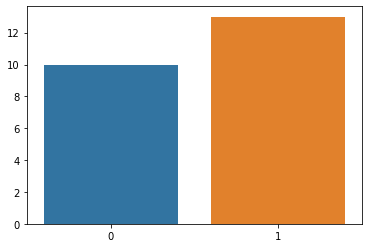

In [33]:
category = data['label'].value_counts()
sns.barplot(x=category.index,y=category.values)

In [35]:
#convert the squenceof strings to k-mers 
def kmer(sequence , size = 7):
  return [sequence[i:i+size].lower() for i in range(len(sequence) - size+1 )]

data['words'] = data.apply(lambda x : kmer(x['DNASequence']) , axis = 1)
data = data.drop('DNASequence' , axis = 1)
data.head()

,label,words
0,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."
1,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."
2,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."
3,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."
4,1,"[cctcaaa, ctcaaat, tcaaatc, caaatca, aaatcac, ..."


In [36]:
#join into  one sentence
data_x = data['words']
for i in range(len(data_x)):
  data_x[i] = ' '.join(data_x[i])
y = np.array(data['label'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [37]:
data_x[0]

'cctcaaa ctcaaat tcaaatc caaatca aaatcac aatcact atcactc tcactct cactctt actcttt ctctttg tctttgg ctttggc tttggca ttggcag tggcagc ggcagcg gcagcga cagcgac agcgacc gcgaccc cgacccc gacccct acccctg cccctgg ccctggt cctggtc ctggtct tggtctc ggtctca gtctcaa tctcaat ctcaata tcaataa caataaa aataaaa ataaaag taaaagt aaaagta aaagtag aagtagg agtaggg gtagggg taggggg agggggc gggggcc ggggcca gggccag ggccaga gccagac ccagaca cagacaa agacaaa gacaaaa acaaaag caaaaga aaaagag aaagagg aagaggc agaggct gaggctc aggctct ggctctc gctctct ctctctt tctctta ctcttag tcttaga cttagat ttagata tagatac agataca gatacag atacagg tacagga acaggag caggagc aggagca ggagcag gagcaga agcagat gcagatg cagatga agatgac gatgaca atgacac tgacaca gacacag acacagt cacagta acagtat cagtatt agtatta gtattag tattaga attagaa ttagaag tagaaga agaagac gaagaca aagacat agacata gacataa acataaa cataaat ataaatt taaattt aaatttg aatttgc atttgcc tttgcca ttgccag tgccagg gccagga ccaggaa caggaaa aggaaaa ggaaaat gaaaatg aaaatgg aaatgga aatggaa atggaaa tggaaac ggaaacc

In [38]:
# convert into count vectorizer features
cv = CountVectorizer( ngram_range = (5,5))
X = cv.fit_transform(data_x)

In [39]:
X.shape

(23, 32932)

In [40]:
#split the data into train and split
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [41]:

print("Shape of the training data----->",X_train.shape)
print("Shape of the training target data----->",y_train.shape)
print("Shape of the testing data----->",X_test.shape)
print("Shape of the testing target data----->",y_test.shape)

Shape of the training data-----> (18, 32932)
Shape of the training target data-----> (18,)
Shape of the testing data-----> (5, 32932)
Shape of the testing target data-----> (5,)


In [42]:
#train the model
mNB = MultinomialNB(alpha = 0.1)
mNB.fit(X_train , y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [43]:
y  = np.array(y)
y_pred = mNB.predict(y_train)

ValueError: ignored